In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'distel(roberta)-combined'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df['class'].values
english_val_labels = val_df['class'].values
english_test_labels = test_df['class'].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df['class'].values
urdu_val_labels = val_df['class'].values
urdu_test_labels = test_df['class'].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df['class'].values
sindhi_val_labels = val_df['class'].values
sindhi_test_labels = test_df['class'].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

# Concatenate text arrays
train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

# Concatenate label arrays
train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

کیا مَیں صحت‌مند تندرست یا مَیں خودغرض ؟ 1
بندوبست ڪري سگهجي ٿو 😉 اچي ٿو fang now نرميءَ سان نرم بستري ۾ ٽپو ڏسڻ ۾ اچي ٿو ته هن جو ڳاڙهي راڪيٽ نسل جي ڪري رهيو 0
reallyvirtual جی ہاں ان گھر والوں نے کیا جیسا مَیں نے پاگل تھا لیکن اس کا مطلب نہیں وہ اس گندگی سخت کوشش نہیں کرتا 1
goldsteinbrooke صرف صهيونسٽ، مسلمان نفرت ڪندڙ بدنام cunt جهڙو ڪانگريس ۾ صرف 2 مسلمان عورتن کي مقرر ڪيل ڪميٽي سيٽ تان هٽائڻ جو جشن ملهائي رهيا آهيو 1
bitcoin jissy586 could someone link def money making method people using read news cannot find tutorial 0


In [6]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
train_data_loader = hlp.create_data_loader(train_texts, np.array(train_labels), tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, np.array(val_labels), tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.27it/s, loss=0.363]


Train loss 0.4290053385570957 accuracy 0.750934737346981
Validation loss 0.37874558443304884 accuracy 0.7802903953693712
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.7802903953693712
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 717/717 [03:38<00:00,  3.28it/s, loss=0.347]


Train loss 0.3721607306678591 accuracy 0.7918124638913415
Validation loss 0.3661714040335252 accuracy 0.7925210111514438
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.7925210111514438
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 717/717 [03:40<00:00,  3.25it/s, loss=0.337]


Train loss 0.3519423799368461 accuracy 0.8069045205315194
Validation loss 0.35458853092652487 accuracy 0.806190522907878
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.806190522907878
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 717/717 [03:40<00:00,  3.25it/s, loss=0.319]


Train loss 0.3352298650947741 accuracy 0.8180559643328209
Validation loss 0.35238513088625345 accuracy 0.8134504071421564
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8134504071421564
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.27it/s, loss=0.303]


Train loss 0.32256441869911956 accuracy 0.8276976574337508
Validation loss 0.35249474856644 accuracy 0.8202688119297558
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.8202688119297558
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.26it/s, loss=0.307]


Train loss 0.3112067633218845 accuracy 0.8346196191285958
Validation loss 0.35184701167389937 accuracy 0.8223126982569737
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.8223126982569737
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.26it/s, loss=0.282]


Train loss 0.3007597651441726 accuracy 0.8407839802914854
Validation loss 0.3578840131290787 accuracy 0.8221164851695608
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 717/717 [03:38<00:00,  3.28it/s, loss=0.299]


Train loss 0.29183481265810246 accuracy 0.8471827070865626
Validation loss 0.3620701632988503 accuracy 0.8241603714967789
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.8241603714967789
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.27it/s, loss=0.262]


Train loss 0.28198500418180866 accuracy 0.852682123897664
Validation loss 0.37107646764571695 accuracy 0.8235880833251579
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 717/717 [03:40<00:00,  3.25it/s, loss=0.262]


Train loss 0.27440123486552115 accuracy 0.8574620927215845
Validation loss 0.3789046442907724 accuracy 0.8229176886098303
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 717/717 [03:40<00:00,  3.25it/s, loss=0.236]


Train loss 0.2673796121877939 accuracy 0.8606887079368193
Validation loss 0.3886862899718424 accuracy 0.8249942771182838
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.8249942771182838
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.26it/s, loss=0.236]


Train loss 0.2610392769801234 accuracy 0.8654087227618081
Validation loss 0.3886250801166231 accuracy 0.8240132116812192
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 717/717 [03:41<00:00,  3.24it/s, loss=0.224]


Train loss 0.2526861682762827 accuracy 0.8700960354055615
Validation loss 0.41000019481491345 accuracy 0.8245200954903692
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.26it/s, loss=0.222]


Train loss 0.248148290474212 accuracy 0.8728430186293425
Validation loss 0.4073201399218587 accuracy 0.8244546911278983
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 717/717 [03:38<00:00,  3.27it/s, loss=0.236]


Train loss 0.24179284260030237 accuracy 0.8765656169266489
Validation loss 0.4246955767086859 accuracy 0.8245200954903692
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 15
Epoch 16/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.26it/s, loss=0.19] 


Train loss 0.235615520048341 accuracy 0.8792635468785768
Validation loss 0.43955226136550746 accuracy 0.8260898001896727
Model and tokenizer saved at epoch 16
Checkpoint saved: Improved validation accuracy at epoch 16: 0.8260898001896727
Metrics logged at epoch 16
Epoch 17/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.27it/s, loss=0.216]


Train loss 0.23023341116047305 accuracy 0.8832041597174531
Validation loss 0.437161055070087 accuracy 0.823261061512803
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 17
Epoch 18/50
----------


Training Progress: 100%|██████████| 717/717 [03:38<00:00,  3.28it/s, loss=0.183]


Train loss 0.22423023151719587 accuracy 0.8867632471085821
Validation loss 0.4552777610937422 accuracy 0.8254848098368162
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 18
Epoch 19/50
----------


Training Progress: 100%|██████████| 717/717 [03:39<00:00,  3.27it/s, loss=0.173]


Train loss 0.21951578642700173 accuracy 0.8898808550530319
Validation loss 0.4783575528585761 accuracy 0.8245037443997515
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 19
Epoch 20/50
----------


Training Progress: 100%|██████████| 717/717 [03:40<00:00,  3.25it/s, loss=0.179]


Train loss 0.21386698491071224 accuracy 0.8935980029867991
Validation loss 0.47691090124421537 accuracy 0.8249615749370484
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 20
Epoch 21/50
----------


Training Progress: 100%|██████████| 717/717 [03:41<00:00,  3.24it/s, loss=0.144]


Train loss 0.20836087344331222 accuracy 0.8956255382233994
Validation loss 0.5030900572882536 accuracy 0.8251250858432257
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


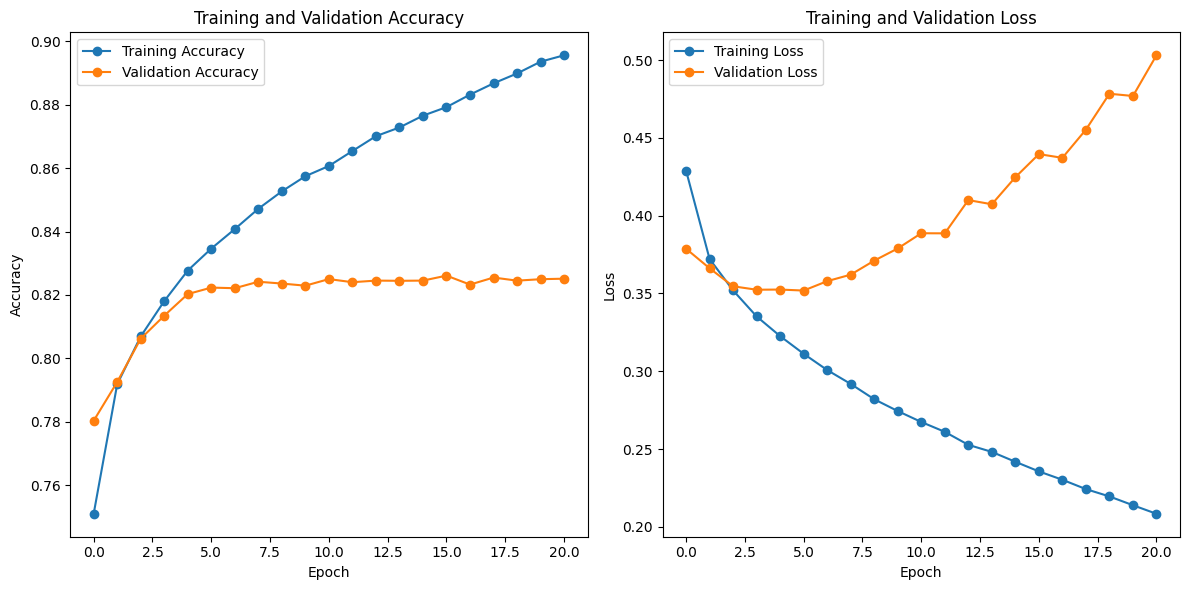

In [8]:
hlp.plot_history(history)

In [9]:
test_data_loader = hlp.create_data_loader(test_texts, np.array(test_labels), tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.8268504439103349 Test Loss: 0.4974467067289552


Accuracy: 0.83
F1 Score: 0.83
Precision: 0.83
Recall: 0.83

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.86      0.80      0.83     32745
        Hate       0.79      0.85      0.82     28416

    accuracy                           0.83     61161
   macro avg       0.83      0.83      0.83     61161
weighted avg       0.83      0.83      0.83     61161



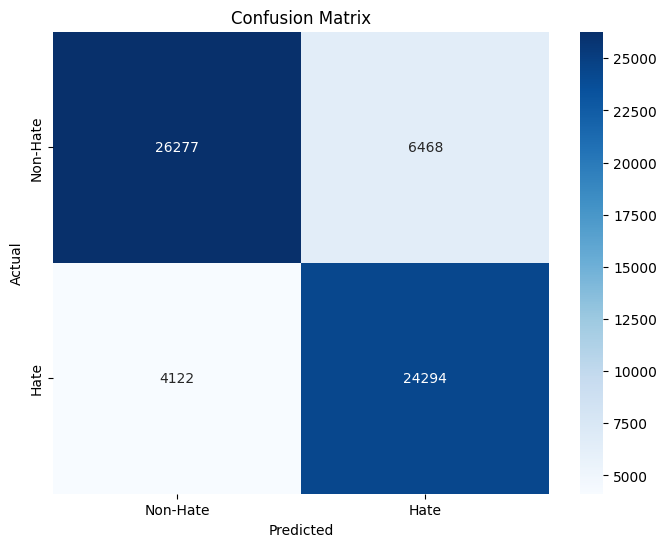

In [10]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [11]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.98
